<h4 align="right">23rd of March 2020</h4>
<h1 align="center">Neural Networks and Deep Learning (CIE 555)</h1>
<h2 align="center">Lab 7: Convolutional Neural Networks</h2> <br>

In [0]:
import keras
keras.__version__

'2.2.5'

# Introduction to convnets

This notebook contains the code sample found in Chapter 5, Section 1 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). 

----



First, let's take a practical look at a very simple convnet example. We will use our convnet to classify MNIST digits, a task that you've already been 
through, using a densely-connected network (our test accuracy then was 95%). Even though our convnet will be very basic, its 
accuracy will still blow out of the water that of the densely-connected model.

The 6 lines of code below show you what a basic convnet looks like. It's a stack of `Conv2D` and `MaxPooling2D` layers. We'll see in a 
minute what they do concretely.
Importantly, a convnet takes as input tensors of shape `(image_height, image_width, image_channels)` (not including the batch dimension). 
In our case, we will configure our convnet to process inputs of size `(28, 28, 1)`, which is the format of MNIST images. We do this via 
passing the argument `input_shape=(28, 28, 1)` to our first layer.

In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

![Conv_basics](https://www.researchgate.net/publication/326963855/figure/fig2/AS:658367580213249@1533978471914/The-sub-convolution-pooling-neural-network.png)


Let's display the architecture of our convnet so far:

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


You can see above that the output of every `Conv2D` and `MaxPooling2D` layer is a 3D tensor of shape `(height, width, channels)`. The width 
and height dimensions tend to shrink as we go deeper in the network. The number of channels is controlled by the first argument passed to 
the `Conv2D` layers (e.g. 32 or 64).

The next step would be to feed our last output tensor (of shape `(3, 3, 64)`) into a densely-connected classifier network like those you are 
already familiar with: a stack of `Dense` layers. These classifiers process vectors, which are 1D, whereas our current output is a 3D tensor. 
So first, we will have to flatten our 3D outputs to 1D, and then add a few `Dense` layers on top:

In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

![Conv_dense](https://miro.medium.com/max/2000/0*HWj5PgxWxdcld_ye)

We are going to do 10-way classification, so we use a final layer with 10 outputs and a softmax activation. Now here's what our network 
looks like:

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

As you can see, our `(3, 3, 64)` outputs were flattened into vectors of shape `(576,)`, before going through two `Dense` layers.

Now, let's train our convnet on the MNIST digits.

In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/5





60000/60000 [==============================] - 51s 846us/step - loss: 0.2147 - acc: 0.9345
Epoch 2/5
60000/60000 [==============================] - 50s 836us/step - loss: 0.0792 - acc: 0.9791
Epoch 3/5
60000/60000 [==============================] - 50s 838us/step - loss: 0.0579 - acc: 0.9854
Epoch 4/5
60000/60000 [==============================] - 50s 834us/step - loss: 0.0435 - acc: 0.9885
Epoch 5/5
60000/60000 [==============================] - 51s 842us/step - loss: 0.0549 - acc: 0.9885


Let's evaluate the model on the test data:

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 3s 299us/step


In [0]:
test_acc

0.9842

While our densely-connected network had a test accuracy of about 95%, our basic convnet has a test accuracy of nearly 99%

___But why does this simple convnet work so well, compared to a densely connected
model?___

___To answer this, let’s dive into what the Conv2D and MaxPooling2D layers do.___

## The convolution operation

## Why?
__Dense is global while Conv is local__
![5.1_1_local_conv.png](https://github.com/ahmadelsallab/practical_dl/blob/master/Keras/notebooks/imgs/5.1_1_local_conv.png?raw=true)

___Key conv properties___:
- The patterns they learn are ___translation invariant___

After learning a certain pattern in the lower-right corner of a picture, a convnet can recognize it ___anywhere___: 

for example, in the upper-left corner. A densely connected network would have to learn the pattern anew if it appeared at a new location. 

This makes convnets ___data efficient___ when processing images (because the visual world is fundamentally translation invariant): 

they need _fewer training samples_ to learn representations that have generalization power.



- They can learn ___spatial hierarchies___ of patterns
the visual world is fundamentally spatially hierarchical
![5.1_2_hier_cat_example.png](https://github.com/ahmadelsallab/practical_dl/blob/master/Keras/notebooks/imgs/5.1_2_hier_cat_example.png?raw=true)


# Using a pre-trained convnet


This notebook contains the code sample found in Chapter 5, Section 3 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). 

----

## When to use transfer learning?
A common and highly effective approach to deep learning on ___small image datasets___ is to leverage a __pre-trained network__. 

A ___pre-trained network___  is simply a saved network previously trained on a large dataset, typically on a large-scale image classification task. 

If this original  dataset is large enough and general enough, then the spatial feature hierarchy learned by the pre-trained network can effectively act as a  generic model of our visual world, and hence its features can prove useful for many different computer vision problems, even though these new problems might involve completely different classes from those of the original task. For instance, one might train a network on ImageNet (where classes are mostly animals and everyday objects) and then re-purpose this trained network for something as remote as identifying furniture items in images. 

Such portability of learned features across different problems is a key advantage of deep learning compared to many older shallow learning approaches, and it makes deep learning very effective for small-data problems.

In our case, we will consider a large convnet trained on the ImageNet dataset (1.4 million labeled images and 1000 different classes). ImageNet contains many animal classes, including different species of cats and dogs, and we can thus expect to perform very well on our cat vs. dog classification problem.

We will use the _VGG16 architecture_, developed by Karen Simonyan and Andrew Zisserman in 2014, a simple and widely used convnet architecture for ImageNet. Although it is a bit of an older model, far from the current state of the art and somewhat heavier than many other recent models, we chose it because its architecture is similar to what you are already familiar with, and easy to understand without introducing any new concepts. This may be your first encounter with one of these cutesie model names -- VGG, ResNet, Inception, Inception-ResNet, Xception... you will get used to them, as they will come up frequently if you keep doing deep learning for computer vision.


![trad_ml.png](http://ruder.io/content/images/2017/03/traditional_ml_setup.png)

http://ruder.io/transfer-learning/


![transfer_learning.png](http://ruder.io/content/images/2017/03/transfer_learning_setup.png)
http://ruder.io/transfer-learning/

## Transfer Learning Scenarios

The three major Transfer Learning scenarios look as follows:

1- ___ConvNet as fixed feature extractor___. 

Take a ConvNet pretrained on ImageNet, remove the last fully-connected layer (this layer’s outputs are the 1000 class scores for a different task like ImageNet), then treat the rest of the ConvNet as a fixed feature extractor for the new dataset. In an AlexNet, this would compute a 4096-D vector for every image that contains the activations of the hidden layer immediately before the classifier. We call these features __CNN codes__. 

It is important for performance that these codes are ReLUd (i.e. thresholded at zero) if they were also thresholded during the training of the ConvNet on ImageNet (as is usually the case). Once you extract the 4096-D codes for all images, train a linear classifier (e.g. Linear SVM or Softmax classifier) for the new dataset.

2- ___Fine-tuning the ConvNet___. 

The second strategy is to not only replace and retrain the classifier on top of the ConvNet on the new dataset, but to also fine-tune the weights of the pretrained network by continuing the backpropagation. 

It is possible to fine-tune all the layers of the ConvNet, or it’s possible to keep some of the earlier layers fixed (due to overfitting concerns) and only fine-tune some higher-level portion of the network. 

_This is motivated by the observation that the earlier features of a ConvNet contain more generic features (e.g. edge detectors or color blob detectors) that should be useful to many tasks, but later layers of the ConvNet becomes progressively more specific to the details of the classes contained in the original dataset._


3- ___Pretrained models___. 

Since modern ConvNets take 2-3 weeks to train across multiple GPUs on ImageNet, it is common to see people release their final ConvNet checkpoints for the benefit of others who can use the networks for fine-tuning. For example, the Caffe library has a Model Zoo where people share their network weights.

The 3rd type is the most obvious, but the least beneficial, as you rarely find the exact model for the exact inputs and outputs (task) you want.

We will focus on scenarios 1 and 2.

## When and how to fine-tune? 

_How do you decide what type of transfer learning you should perform on a new dataset?_

Specifically we need to pick two actions:

1- Re-use how many layers from the source to target domain (how big is the convbase)?

2- Fine tune or not the convbase?

This is a function of several factors, but the two most important ones:

__A- are the size of the new dataset (small or big), and__

__B- its similarity to the original dataset__
(e.g. ImageNet-like in terms of the content of images and the classes, or very different, such as microscope images). 



Keeping in mind that ConvNet features are more generic in early layers and more ___original-dataset-specific___ in later layers, here are some common rules of thumb for navigating the 4 major scenarios:

1- ___New dataset is small and similar to original dataset___. Since the data is small, it is not a good idea to fine-tune the ConvNet due to overfitting concerns (big model and small data). Since the data is similar to the original data, we expect higher-level features in the ConvNet to be relevant to this dataset as well. 

_Hence, the best idea might be to train a linear classifier on the CNN codes._

__Max Reuse, No Fine-tune__

2- ___New dataset is large and similar to the original dataset___. 

Since we have more data, we can have more confidence that we won’t overfit if we were to try to _fine-tune through the full network._

__Max Reuse, Fine-tune__

3- ___New dataset is small but very different from the original dataset___. Since the data is small, it is likely best to only train a linear classifier. Since the dataset is very different, it might not be best to train the classifier form the top of the network, which contains more dataset-specific features. 

Instead, it might work better to _train the classifier from activations somewhere earlier in the network._

__Min Reuse, No Fine-tune__

4- ___New dataset is large and very different from the original dataset___. Since the dataset is very large, we may expect that we can afford to train a ConvNet from scratch. However, in practice it is very often still beneficial to initialize with weights from a pretrained model. 

_In this case, we would have enough data and confidence to fine-tune through the entire network._

__NoReuse, Fine-tune__
__No need to transfer__

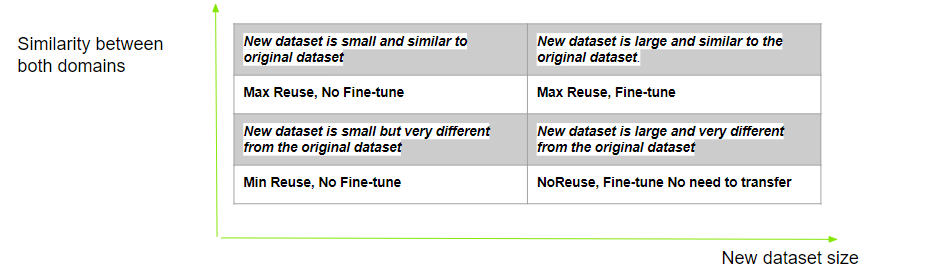

- _Learning rates._

It’s common to use a _smaller learning rate for ConvNet weights that are being fine-tuned_, in comparison to the (randomly-initialized) weights for the new linear classifier that computes the class scores of your new dataset. 

This is _because we expect that the ConvNet weights are relatively good, so we don’t wish to distort them too quickly and too much (especially while the new Linear Classifier above them is being trained from random initialization)._


## Feature extraction

Feature extraction consists of using the representations learned by a previous network to extract interesting features from new samples. 
These features are then run through a new classifier, which is trained from scratch.

As we saw previously, convnets used for image classification comprise two parts: they start with a series of pooling and convolution 
layers, and they end with a densely-connected classifier. The first part is called the "convolutional base" of the model. In the case of 
convnets, "feature extraction" will simply consist of taking the convolutional base of a previously-trained network, running the new data 
through it, and training a new classifier on top of the output.

![swapping FC classifiers](https://s3.amazonaws.com/book.keras.io/img/ch5/swapping_fc_classifier.png)

___Why only reuse the convolutional base? Could we reuse the densely-connected classifier as well___

In general, it should be avoided. The reason is simply that the representations learned by the convolutional base are likely to be more ___generic and therefore more reusable___: the feature maps of a convnet are presence maps of generic concepts over a picture, which is likely to be useful regardless of the computer vision problem at hand. On the other end, the representations learned by the classifier will necessarily be ___very specific___ to the set of classes that the model was trained on -- they will only contain information about the presence probability of this or that class in the entire picture. 

Additionally, representations found in _densely-connected layers_ no longer contain any information about _where_ objects are 
located in the input image: these layers get rid of the notion of space, whereas the object location is still described by convolutional feature maps. _For problems where object location matters, densely-connected features would be largely useless._

Note that the _level of generality (and therefore reusability)_ of the representations extracted by specific convolution layers depends on the _depth of the layer in the model_. Layers that come earlier in the model extract local, highly generic feature maps (such as visual edges, colors, and textures), while layers higher-up extract more abstract concepts (such as "cat ear" or "dog eye"). So if your new dataset differs a lot from the dataset that the original model was trained on, you may be better off using only the first few layers of the model to do feature extraction, rather than using the entire convolutional base.

In our case, since the ImageNet class set did contain multiple dog and cat classes, it is likely that it would be beneficial to reuse the information contained in the densely-connected layers of the original model. However, we will chose not to, in order to cover the more general case where the class set of the new problem does not overlap with the class set of the original model.

Let's put this in practice by using the convolutional base of the VGG16 network, trained on ImageNet, to extract interesting features from 
our cat and dog images, and then training a cat vs. dog classifier on top of these features.

The VGG16 model, among others, comes pre-packaged with Keras. You can import it from the `keras.applications` module. Here's the list of 
image classification models (all pre-trained on the ImageNet dataset) that are available as part of `keras.applications`:

* Xception
* InceptionV3
* ResNet50
* VGG16
* VGG19
* MobileNet

Let's instantiate the VGG16 model:

In [0]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

We passed three arguments to the constructor:

* `weights`, to specify which weight checkpoint to initialize the model from
* `include_top`, which refers to including or not the densely-connected classifier on top of the network. By default, this 
densely-connected classifier would correspond to the 1000 classes from ImageNet. Since we intend to use our own densely-connected 
classifier (with only two classes, cat and dog), we don't need to include it.
* `input_shape`, the shape of the image tensors that we will feed to the network. This argument is purely optional: if we don't pass it, 
then the network will be able to process inputs of any size.

Here's the detail of the architecture of the VGG16 convolutional base:

In [0]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

The final feature map has shape `(4, 4, 512)`. That's the feature on top of which we will stick a densely-connected classifier.

At this point, there are two ways we could proceed: 


__1) Offline__ Running the convolutional base over our dataset, _recording its output to a Numpy array on disk_, then using this data as input to a standalone densely-connected classifier similar to those you have seen in the first chapters of this book. 

_This solution is very fast (fast training because the expensive conv operation is not run every step of backprop, but slow in saving the data for sure) and cheap to run_, because it only requires running the convolutional base once for every input image, and the convolutional base is by far the most expensive part of the pipeline. 

_However, for the exact same reason, this technique would not allow us to leverage data augmentation at all (because you already work at the features level)._
But you can think of another way to do data augmentation in the offline mode, which is to apply image transformations on the _static_ data on disk, and then extract features for those.
However, doing so, will limit the amount of augmented data, since it's done once at the beginning, versus doing augmentation at every step of the trainig, so getting new uncorrelated samples with every step.
Note that: the offline data augmentation is not supported in Keras, since the ImageGenerator class is called within fit_generator, so must be online.

___Advantages___:
- Fast training (no conv during training)

___Disadvantages___:
- Augmentation not possible in Keras (not even offline augmentation)
- Offline autmentation limits the amount of generated data unlike the online mode. There might be correlations as well.



__2) Online__ Extending the model we have (`conv_base`) by _adding `Dense` layers on top, and running the whole thing end-to-end on the input data._

_This allows us to use data augmentation_, because every input image is going through the convolutional base every time it is seen by the model. 

_However, for this same reason, this technique is far more expensive than the first one._

___Advantages___:
- Online augmentation provides unlimited, and uncorrelated samples, with every training step.


___Disadvantages___:
- Slow training 


__In both cases, the conv_base is not updated during training__. 
The main difference between the 2 approaches is __data augmentation__. Remember that, the data generator is using _yield_, which means, it generates new samples on the fly during training. On one hand, this enables data augmentation in training time. On the other hand its expensive, as we need to run the conv_base during the training steps (conv is expensive).

In theory, it's possible to augment the data statically (pre-generated), and use approach 1. But we will have limited data, unlike the generation on the fly approach. However, in Keras, we have to use fit_generator with the ImageDataGenerator, which means it must be gnerated on the fly using _yield_, __that's why we cannot use data augmentation with the first approach.__

We will cover both techniques. Let's walk through the code required to set-up the first one: recording the output of `conv_base` on our data and using these outputs as inputs to a new model.

__FAST FEATURE EXTRACTION WITHOUT DATA AUGMENTATION__

We will start by simply running instances of the previously-introduced `ImageDataGenerator` to extract images as Numpy arrays as well as their labels. We will extract features from these images simply by calling the `predict` method of the `conv_base` model.

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
from getpass import getpass
import os
user = 'ahmadelsallab'
key = '6b7ffe97ff5bc0656e325b746b72fa31'

if '.kaggle' not in os.listdir('/root'):
    !mkdir ~/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 666 /root/.kaggle/kaggle.json
with open('/root/.kaggle/kaggle.json', 'w') as f:
    f.write('{"username":"%s","key":"%s"}' % (user, key))
!chmod 600 /root/.kaggle/kaggle.json


!kaggle competitions download -c dogs-vs-cats
!chmod 777 *
!unzip train.zip

In [0]:
import os
import numpy as np
import os, shutil

original_dataset_dir = 'train'

# The directory where we will
# store our smaller dataset
base_dir = '/cats_and_dogs_small'
try:
  os.mkdir(base_dir)
except:
  pass

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
try:
  os.mkdir(train_dir)
except:
  pass  
validation_dir = os.path.join(base_dir, 'validation')
try:
  os.mkdir(validation_dir)
except:
  pass   
test_dir = os.path.join(base_dir, 'test')
try:
  os.mkdir(test_dir)
except:
  pass   

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
try:
  os.mkdir(train_cats_dir)
except:
  pass   

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
try:
  os.mkdir(train_dogs_dir)
except:
  pass   

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
try:
  os.mkdir(validation_cats_dir)
except:
  pass 

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
try:
  os.mkdir(validation_dogs_dir)
except:
  pass   

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
try:
  os.mkdir(test_cats_dir)
except:
  pass   

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
try:
  os.mkdir(test_dogs_dir)
except:
  pass   

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)



In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


The extracted features are currently of shape `(samples, 4, 4, 512)`. We will feed them to a densely-connected classifier, so first we must 
flatten them to `(samples, 8192)`:

In [0]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

# OR model.add(layers.Flatten())

At this point, we can define our densely-connected classifier (note the use of dropout for regularization), and train it on the data and 
labels that we just recorded:

In [0]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.5808 - acc: 0.6915 - val_loss: 0.4372 - val_acc: 0.8160
Epoch 2/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.4283 - acc: 0.8080 - val_loss: 0.3516 - val_acc: 0.8710
Epoch 3/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3581 - acc: 0.8450 - val_loss: 0.3147 - val_acc: 0.8890
Epoch 4/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3100 - acc: 0.8735 - val_loss: 0.2931 - val_acc: 0.8920
Epoch 5/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.2890 - acc: 0.8830 - val_loss: 0.2779 - val_acc: 0.8910
Epoch 6/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.2634 - acc: 0.8975 - val_loss: 0.2671 - val_acc: 0.8990
Epoch 7/30
2000/2000 [==========

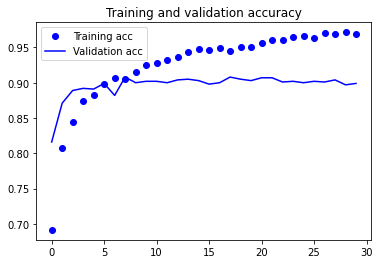

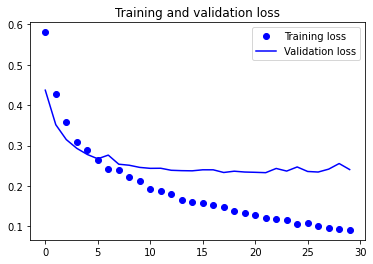

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


We reach a validation accuracy of about 90%. 

However, our plots indicate that we are overfitting almost from the start -- despite using dropout with a fairly large rate. 

_This is because this technique does not leverage data augmentation, which is essential to preventing overfitting with small image datasets._

__FEATURE EXTRACTION WITH DATA AUGMENTATION__

Now, let's review the second technique we mentioned for doing feature extraction, which is much slower and more expensive, but which allows us to leverage data augmentation during training: extending the `conv_base` model and running it end-to-end on the inputs. 

Note that this technique is in fact so expensive that you should only attempt it if you have access to a GPU: it is absolutely intractable on CPU. If you cannot run your code on GPU, then the previous technique is the way to go.

Because models behave just like layers, you can add a model (like our `conv_base`) to a `Sequential` model just like you would add a layer. 

So you can do the following:

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


___As you can see, the convolutional base of VGG16 has 14,714,688 parameters, which is very large. The classifier we are adding on top has 2 million parameters.___

Before we compile and train our model, ___a very important thing to do is to freeze the convolutional base___. 
"Freezing" a layer or set of layers means preventing their weights from getting updated during training. 

If we don't do this, then the representations that were previously learned by the convolutional base would get modified during training. Since the `Dense` layers on top are randomly initialized, very large weight updates would be propagated through the network, effectively destroying the representations previously learned.

In Keras, freezing a network is done by setting its `trainable` attribute to `False`:

In [0]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [0]:
conv_base.trainable = False

In [0]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


With this setup, only the weights from the two `Dense` layers that we added will be trained. That's a total of four weight tensors: two per layer (the main weight matrix and the bias vector). 

Note that in order for these changes to take effect, we must first compile the model. 

If you ever modify weight trainability after compilation, you should then re-compile the model, or these changes would be ignored.

Now we can start training our model, with the same data augmentation configuration that we used in our previous example:

__Please take care of the parameter: process_input in ImageDataGenerator class.__
This one is important as it performs the necessary preprocessing needed for the image before giving it to the model you transfer from.
Every pre-trained net typically provides the good pre-processing function.

For VGG16: keras.applications.vgg16.preprocess_input
It's also ok to use from keras.applications.imagenet_utils import preprocess_input in case of VGG

In [0]:
#@title Default title text
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.imagenet_utils import preprocess_input


train_datagen = ImageDataGenerator(
      #rescale=1./255,
      preprocessing_function=preprocess_input,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)#rescale=1./255) # Issue: https://github.com/fchollet/deep-learning-with-python-notebooks/issues/21

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = valid_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
 - 720s - loss: 1.8967 - acc: 0.7535 - val_loss: 0.5687 - val_acc: 0.9160
Epoch 2/30
 - 719s - loss: 0.8944 - acc: 0.8760 - val_loss: 0.4721 - val_acc: 0.9430
Epoch 3/30
 - 720s - loss: 0.6743 - acc: 0.8950 - val_loss: 0.3690 - val_acc: 0.9460
Epoch 4/30
 - 720s - loss: 0.6835 - acc: 0.8975 - val_loss: 0.3288 - val_acc: 0.9540
Epoch 5/30
 - 720s - loss: 0.5380 - acc: 0.9200 - val_loss: 0.3662 - val_acc: 0.9580
Epoch 6/30
 - 719s - loss: 0.5548 - acc: 0.9135 - val_loss: 0.3232 - val_acc: 0.9570
Epoch 7/30
 - 720s - loss: 0.5046 - acc: 0.9235 - val_loss: 0.3203 - val_acc: 0.9600
Epoch 8/30
 - 721s - loss: 0.4729 - acc: 0.9275 - val_loss: 0.2905 - val_acc: 0.9630
Epoch 9/30
 - 720s - loss: 0.4423 - acc: 0.9365 - val_loss: 0.3035 - val_acc: 0.9610
Epoch 10/30
 - 724s - loss: 0.3899 - acc: 0.9375 - val_loss: 0.2996 - val_acc: 0.9640
Epoch 11/30
 - 724s - loss: 0.3879 - acc: 0.9435 - val_loss: 0.26

In [0]:
model.save('gdrive/My Drive/cats_and_dogs_small_3.h5')

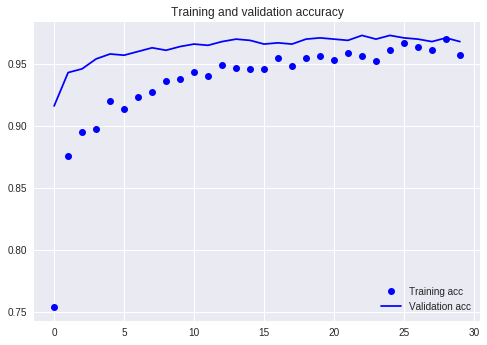

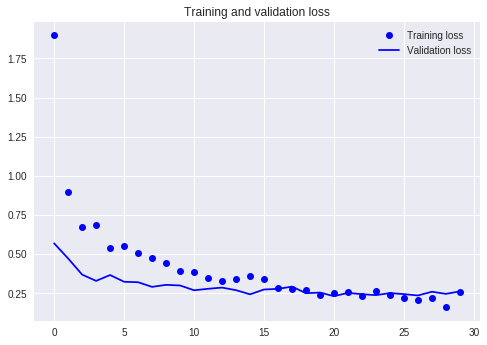

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

As you can see, we reach a validation accuracy of about 96%. This is much better than our small convnet trained from scratch.

## Fine-tuning

Another widely used technique for model reuse, complementary to feature extraction, is _fine-tuning_. 
Fine-tuning consists in unfreezing a few of the top layers 
of a frozen model base used for feature extraction, and jointly training both the newly added part of the model (in our case, the 
fully-connected classifier) and these top layers. This is called "fine-tuning" because it slightly adjusts the more abstract 
representations of the model being reused, in order to make them more relevant for the problem at hand.

![fine-tuning VGG16](https://s3.amazonaws.com/book.keras.io/img/ch5/vgg16_fine_tuning.png)

We have stated before that it was necessary to freeze the convolution base of VGG16 in order to be able to train a randomly initialized classifier on top. For the same reason, it is only possible to fine-tune the top layers of the convolutional base once the classifier on top has already been trained. If the classified wasn't already trained, then the error signal propagating through the network during training would be too large, and __the representations previously learned by the layers being fine-tuned would be destroyed__. Thus the steps 
for fine-tuning a network are as follow:

* 1) Add your custom network on top of an already trained base network.
* 2) Freeze the base network.
* 3) Train the part you added.
* 4) Unfreeze some layers in the base network.
* 5) Jointly train both these layers and the part you added.

We have already completed the first 3 steps when doing feature extraction. Let's proceed with the 4th step: we will unfreeze our `conv_base`, and then freeze individual layers inside of it.

As a reminder, this is what our convolutional base looks like:

In [0]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________


We will fine-tune the last 3 convolutional layers, which means that all layers up until `block4_pool` should be frozen, and the layers 
`block5_conv1`, `block5_conv2` and `block5_conv3` should be trainable.

### Why not fine-tune more layers? Why not fine-tune the entire convolutional base? We could. However, we need to consider that:

* If we do, we gain nothing from Transfer Learnig: 

Earlier layers in the convolutional base encode more generic, reusable features, while layers higher up encode more specialized features. It is more useful to fine-tune the more specialized features, as these are the ones that need to be repurposed on our new problem. There would 
be fast-decreasing returns in fine-tuning lower layers.

* Risk of overfitting for big model:

The more parameters we are training, the more we are at risk of overfitting. _The convolutional base has 15M parameters_, so it would be risky to attempt to train it on our small dataset.
Thus, in our situation, it is a good strategy to only fine-tune the top 2 to 3 layers in the convolutional base.

Let's set this up, starting from where we left off in the previous example:

In [0]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

Now we can start fine-tuning our network. We will do this with the RMSprop optimizer, using a very low learning rate. The reason for using 
a low learning rate is that we want to limit the magnitude of the modifications we make to the representations of the 3 layers that we are 
fine-tuning. Updates that are too large may harm these representations.

Now let's proceed with fine-tuning:

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 819s 8s/step - loss: 0.3258 - acc: 0.9530 - val_loss: 0.2734 - val_acc: 0.9690
Epoch 2/100
100/100 [==============================] - 812s 8s/step - loss: 0.2327 - acc: 0.9645 - val_loss: 0.3164 - val_acc: 0.9640
Epoch 3/100
100/100 [==============================] - 814s 8s/step - loss: 0.1897 - acc: 0.9670 - val_loss: 0.3276 - val_acc: 0.9660
Epoch 4/100
100/100 [==============================] - 816s 8s/step - loss: 0.2006 - acc: 0.9570 - val_loss: 0.2238 - val_acc: 0.9730
Epoch 5/100
100/100 [==============================] - 812s 8s/step - loss: 0.1750 - acc: 0.9665 - val_loss: 0.4037 - val_acc: 0.9600
Epoch 6/100
 30/100 [========>.....................] - ETA: 6:44 - loss: 0.1970 - acc: 0.9533

KeyboardInterrupt: ignored

In [0]:
model.save('gdrive/My Drive/cats_and_dogs_small_4.h5')

Let's plot our results using the same plotting code as before:

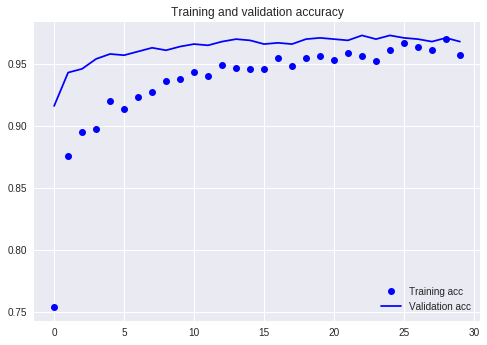

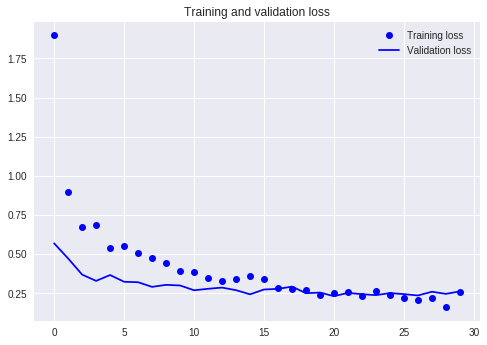

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.9639999938011169



Here we get a test accuracy of 97%. In the original Kaggle competition around this dataset, this would have been one of the top results. 
However, using modern deep learning techniques, we managed to reach this result using only a very small fraction of the training data 
available (about 10%). There is a huge difference between being able to train on 20,000 samples compared to 2,000 samples!

# **Exercise**

Use CIFAR10 image dataset (10 classes) to compare the performance of a convNet built from scratch and using transfer learning by extracting the features of VGG16 model and train a linear classifier on top. Use the offline method for feature extraction.

Plot train and validation accuracies in both cases. 

In [0]:
# my own-model
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Note: In this case, since we already loaded the data, we use datagen.flow() instead of datagen.flow_from_directory()

In [0]:
#x_train = x_train[:6000]
#x_test= x_test[:1000]
#y_train = y_train[:6000]
#y_test= y_test[:1000]

# convert from integers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# normalize to range (0,1)
x_train = x_train / 255.0
x_test = x_test / 255.0

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [24]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_9 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_10 (Batc (None, 13, 13, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 6, 6, 64)         

In [12]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.fit(x_train, y_train, epochs=6, batch_size=64,verbose=1, validation_split=1/6)

test_loss, test_acc = model.evaluate(x_test, y_test)
test_acc

Epoch 1/6
652/652 [==============================] - 76s 117ms/step - loss: 1.2384 - accuracy: 0.5645 - val_loss: 1.4902 - val_accuracy: 0.4768
Epoch 2/6
652/652 [==============================] - 77s 117ms/step - loss: 1.0272 - accuracy: 0.6407 - val_loss: 1.4941 - val_accuracy: 0.5301
Epoch 3/6
652/652 [==============================] - 77s 118ms/step - loss: 0.9237 - accuracy: 0.6814 - val_loss: 0.9879 - val_accuracy: 0.6585
Epoch 4/6
652/652 [==============================] - 77s 118ms/step - loss: 0.8477 - accuracy: 0.7076 - val_loss: 0.9455 - val_accuracy: 0.6782
Epoch 5/6
652/652 [==============================] - 77s 119ms/step - loss: 0.7972 - accuracy: 0.7259 - val_loss: 1.0285 - val_accuracy: 0.6440
Epoch 6/6
313/313 [==============================] - 5s 15ms/step - loss: 0.9485 - accuracy: 0.6811


0.6811000108718872

In [0]:
# VGG-16 covolutional base
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train[:6000]
x_test= x_test[:1000]
y_train = y_train[:6000]
y_test= y_test[:1000]

# convert from integers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# normalize to range (0,1)
x_train = x_train / 255.0
x_test = x_test / 255.0

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [42]:

from tensorflow.keras.applications import VGG16
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
#model.add(layers.BatchNormalization())
#model.add(layers.Dropout(0.25))
#model.add(layers.Dense(128, activation='relu'))
#model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary



<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fae8bd70358>>

In [43]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=6,
                    batch_size=64,
                    validation_split=1/6)

test_loss, test_acc = model.evaluate(x_test, y_test)
test_acc

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4
Epoch 1/6
79/79 [==============================] - 62s 789ms/step - loss: 2.4619 - acc: 0.1188 - val_loss: 2.2725 - val_acc: 0.1440
Epoch 2/6
79/79 [==============================] - 62s 789ms/step - loss: 2.3540 - acc: 0.1432 - val_loss: 2.2127 - val_acc: 0.1970
Epoch 3/6
79/79 [==============================] - 62s 790ms/step - loss: 2.3051 - acc: 0.1576 - val_loss: 2.1653 - val_acc: 0.2460
Epoch 4/6
79/79 [==============================] - 62s 788ms/step - loss: 2.2603 - acc: 0.1752 - val_loss: 2.1238 - val_acc: 0.2900
Epoch 5/6
79/79 [==============================] - 63s 803ms/step - loss: 2.2105 - acc: 0.1962 - val_loss: 2.0863 - val_acc: 0.3140
Epoch 6/6
32/32 [==============================] - 11s 328ms/step - loss: 2.0372 - acc: 0.3150


0.3149999976158142